<a href="https://www.kaggle.com/code/siegfredlorellecmina/ai-avenue-2-introduction-to-computer-vision-nb-2?scriptVersionId=176230685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# AI Avenue 2: Introduction to Computer Vision

## Fine-tuning Convolutional Neural Network (CNN)

### Steps:
1. Acquire Data
2. Preprocess Data
3. Use Model
4. Train Model
5. Test Model

In [3]:
# Import libraries used across the notebook
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
import os
import shutil
import glob
import random
# import matplotlib.pyplot as plt

# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)
# %matplotlib inline

In [4]:
# Ensure a GPU is used by TensorFlow 
GPUs = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(GPUs[0], True)
except:
    print("Dynamic memory allocation on GPU was not set.")
    
print(f"Num of GPUs: {len(GPUs)}")


Num of GPUs: 1


### 1. Acquire Data
- Download dogs vs cats dataset named 'dogs-vs-cats.zip' from [this Google Drive](https://drive.google.com/drive/folders/14xi2BkY3D8UL77kWoPN30GJOcnVyfBWf)
- Upload the dogs vs cats dataset in Kaggle



<details>
    <summary>Detailed steps?</summary>
    
1. #### Click 'Upload'
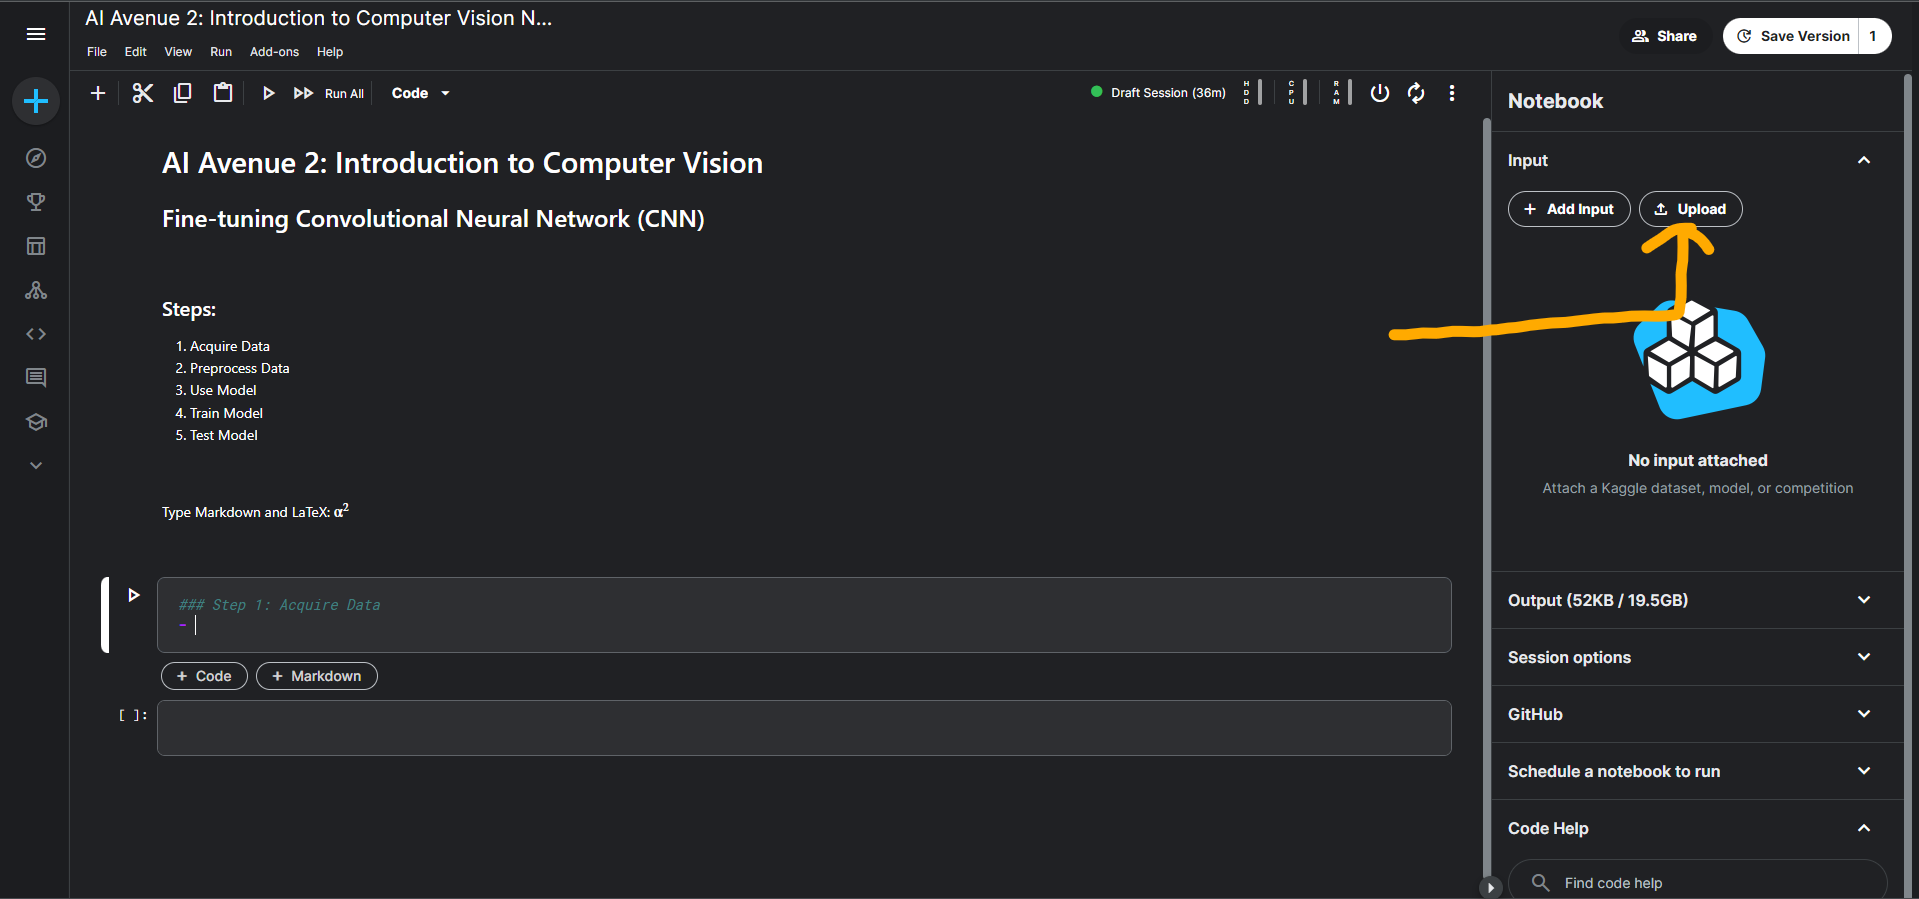
2. #### Click 'Create New Dataset'
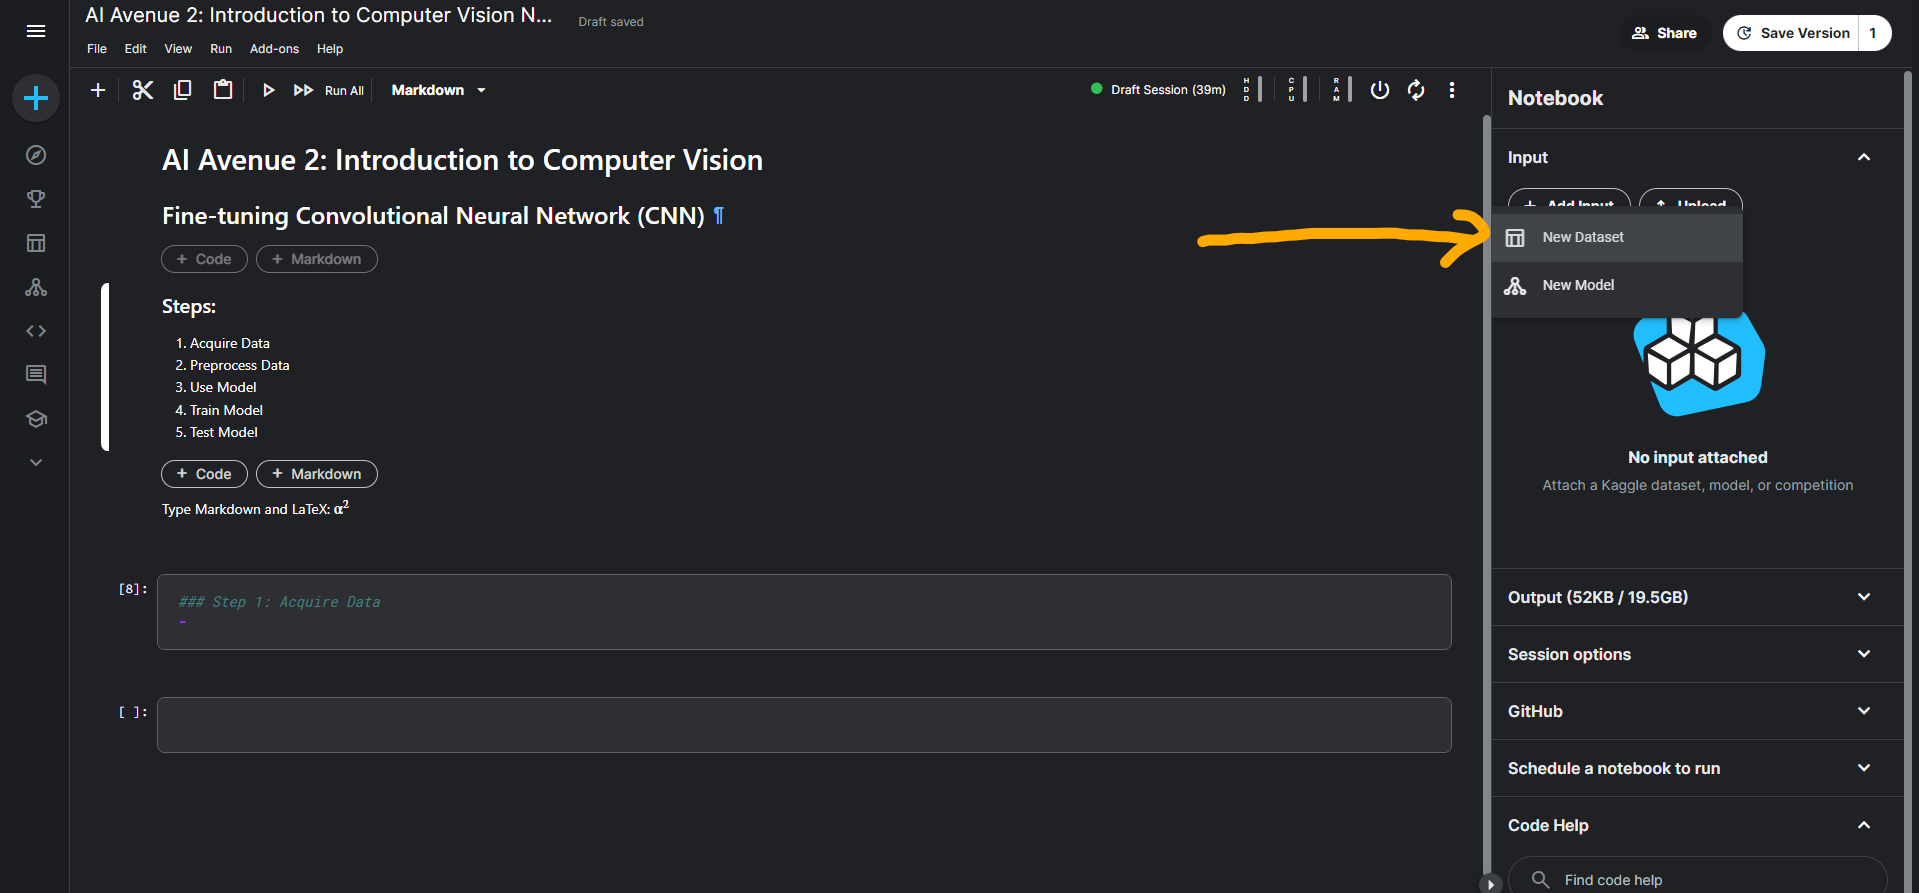
3. #### Upload Dataset
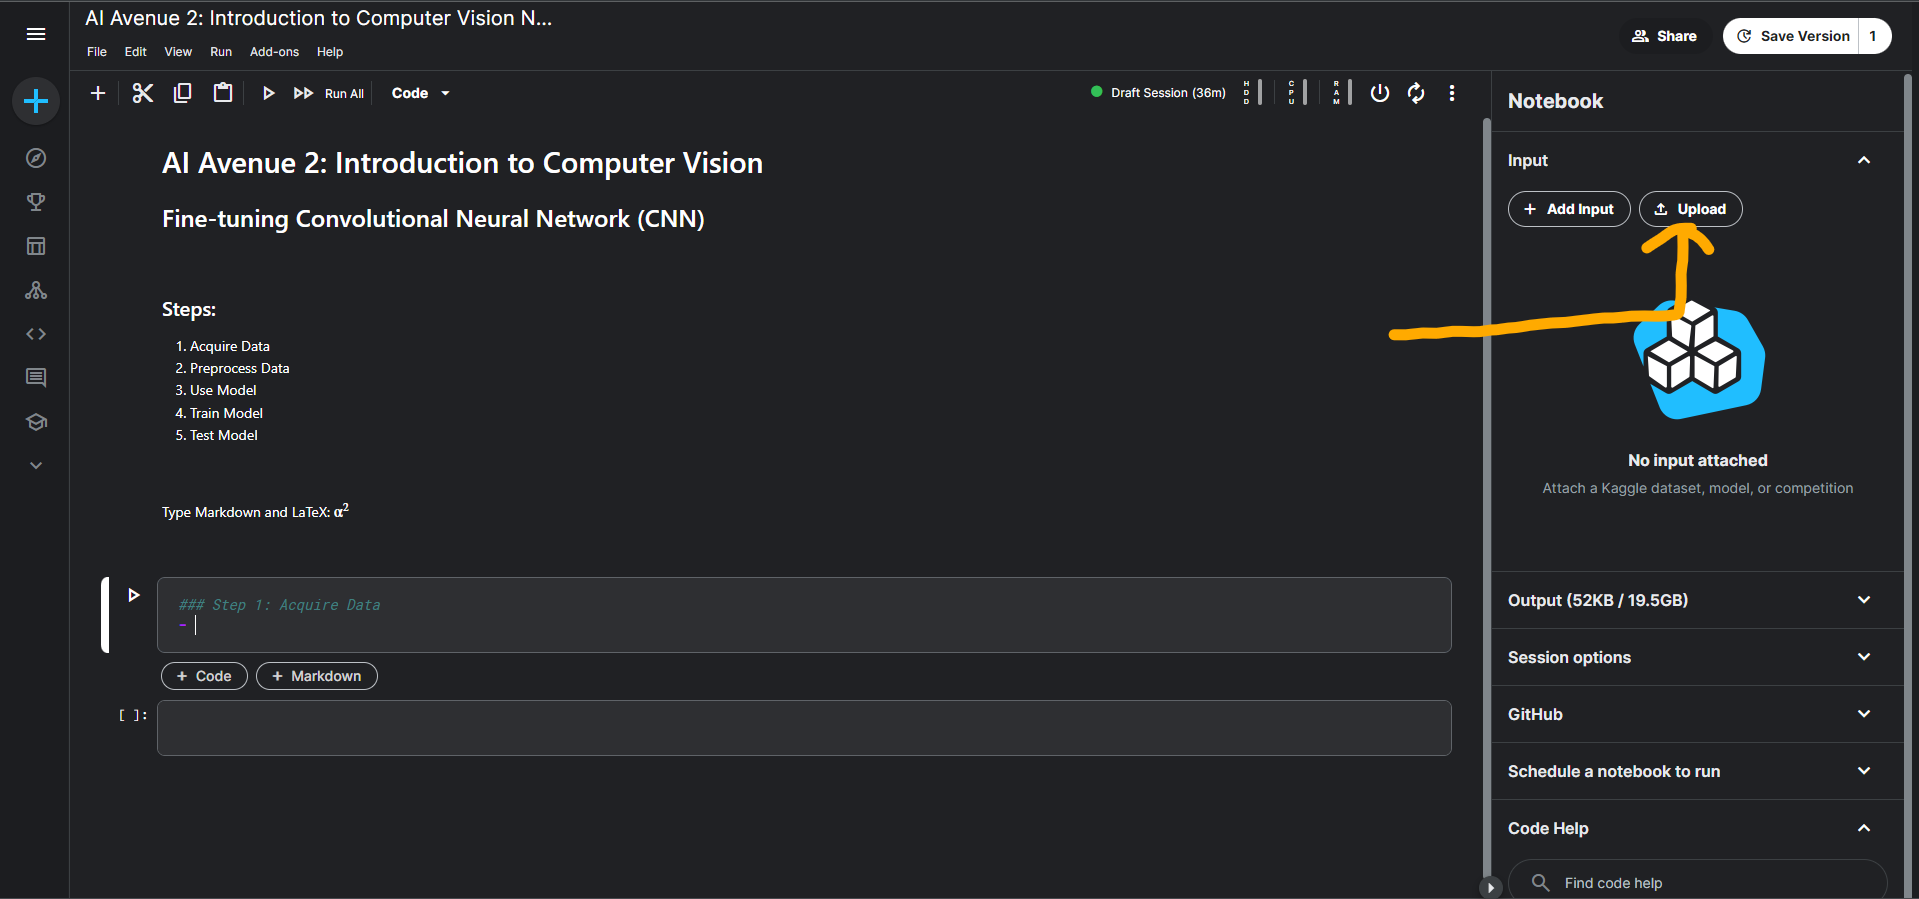
4. #### Name Dataset then click 'Create'
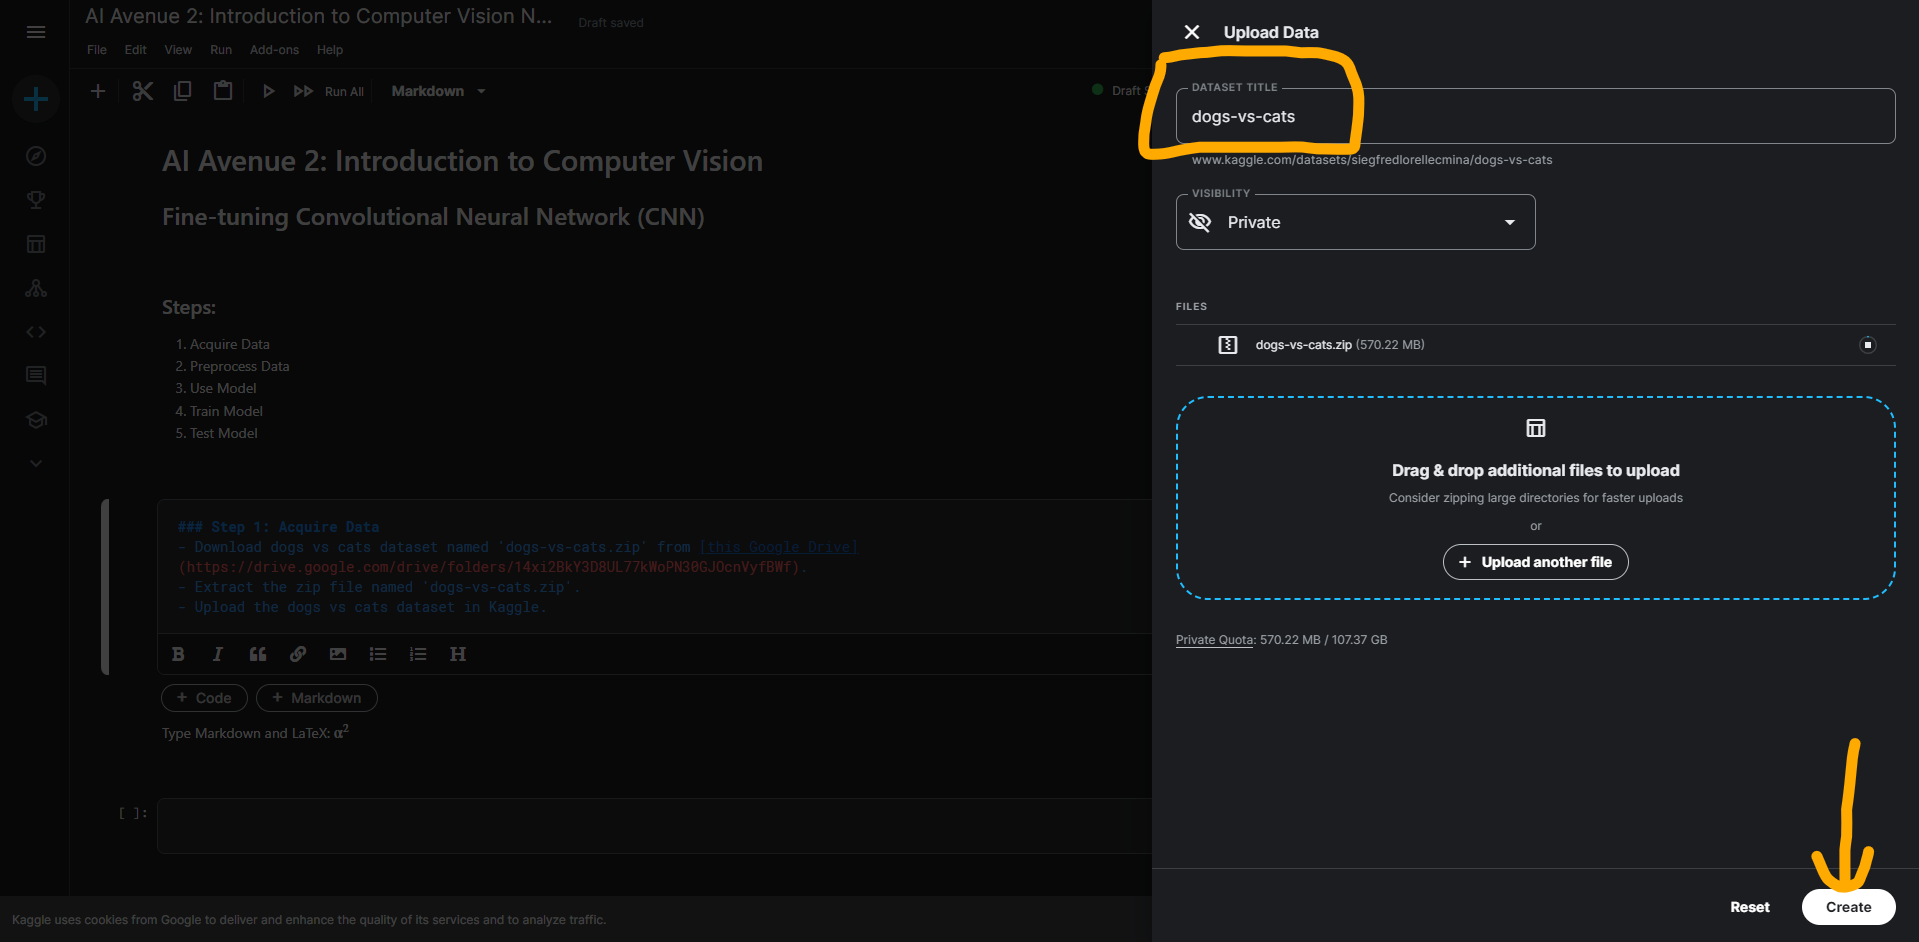
5. #### Check if Dataset is uploaded
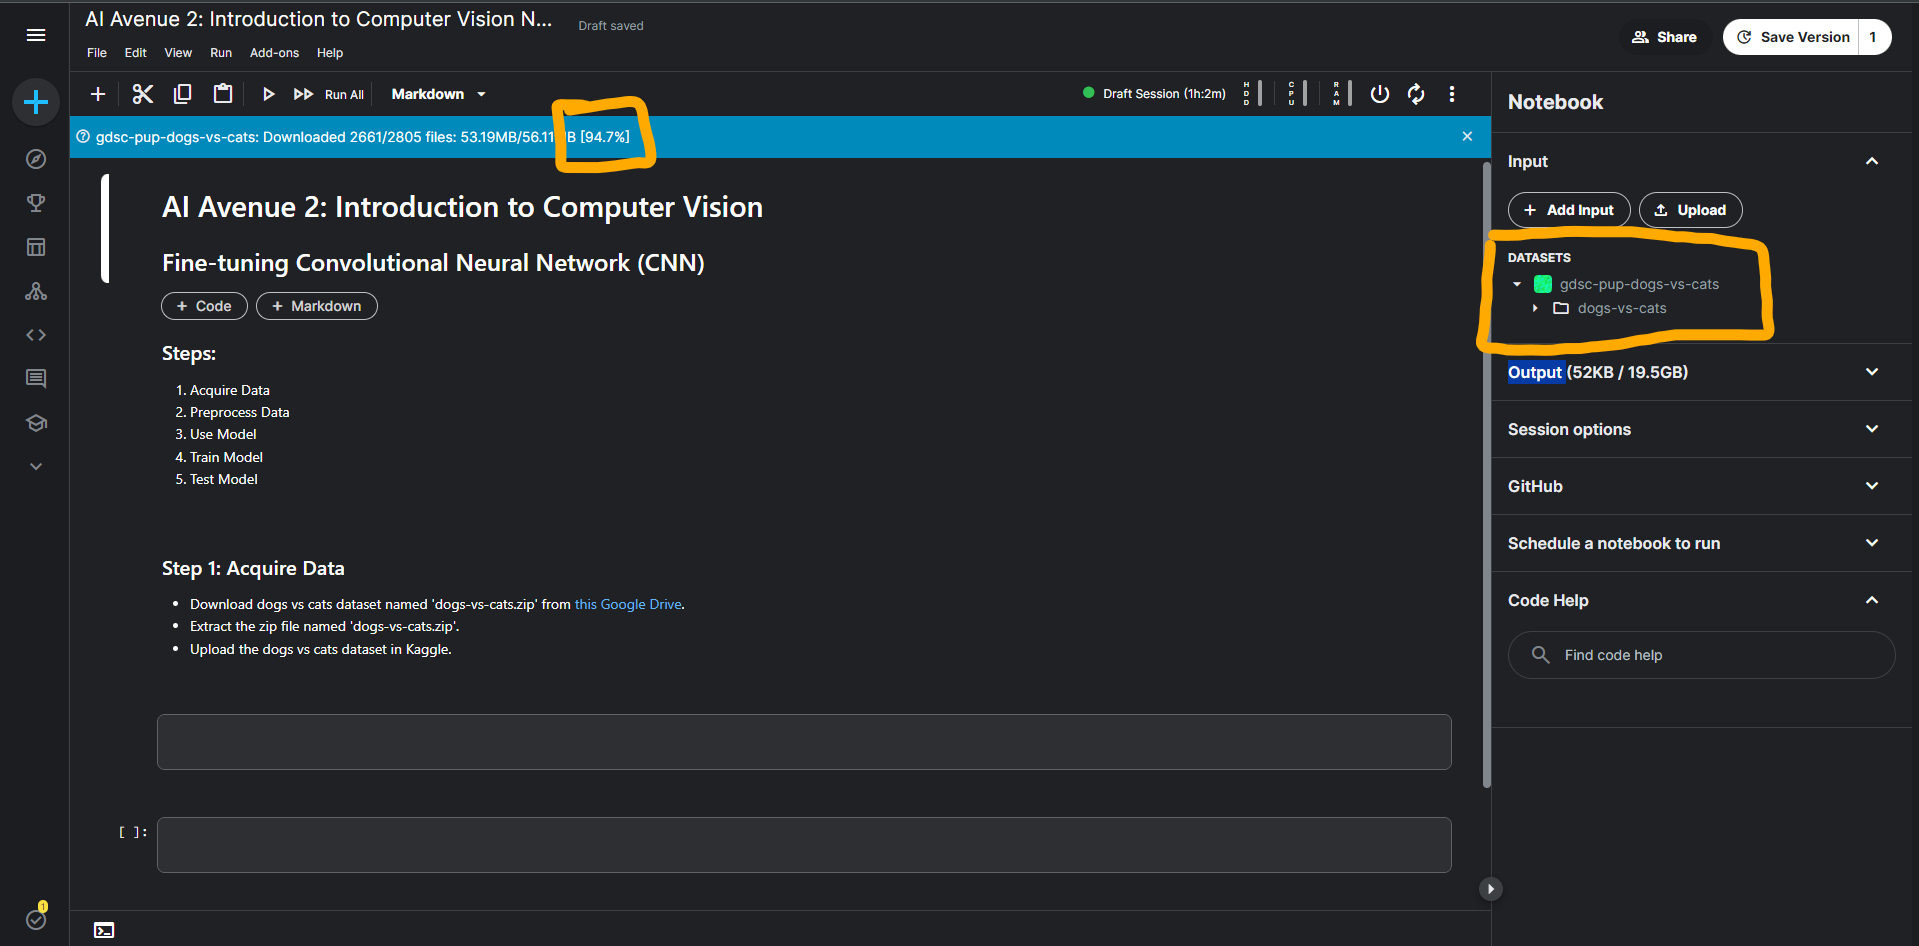
</details>


In [5]:
# Check if dataset is downloaded

input_dataset_path = '/kaggle/input/dogs-vs-cats-for-gdsc/dogs-vs-cats'

files = os.listdir(input_dataset_path)
print(f"Num of files in input dataset: {len(files)}")


Num of files in input dataset: 25000


In [ ]:
# # View all files in the dataset
# files

### 2. Preprocess Data
- Separate data by label
-  Split the dataset into three (3) subsets
    - train set
    - valid set
    - test set
- Process the data to match the model's expected input

In [6]:
# Clear/deletes all files in working directory
# Warning: Only run this to reset working directory from scratch (empty)

working_directory_path = "/kaggle/working/"

os.chdir(working_directory_path)
for file in os.listdir(working_directory_path):
    if os.path.isdir(file):
        shutil.rmtree(file)
    else:
        os.remove(file)
        
print(os.listdir(working_directory_path))

[]


In [7]:
# Copy dataset (from input) to working kaggle directory

input_dataset_path = "/kaggle/input/dogs-vs-cats-for-gdsc/dogs-vs-cats"
working_dir_path = "/kaggle/working/"

input_files = os.listdir(input_dataset_path)

src = input_dataset_path
dest = os.path.join(working_dir_path,"data")

if not os.path.exists(dest) or len(os.listdir(dest)) != len(input_files):
    shutil.copytree(src, dest, dirs_exist_ok=True)


files = os.listdir(dest)
print(f"Num of files in working directory: {len(files)}")


Num of files in working directory: 25000


In [8]:
# Create train, valid, test directories

# Move to the dataset in working directory
dataset_path = "/kaggle/working/data"
print(os.getcwd())
os.chdir(dataset_path)
print(os.getcwd())

# Create train, valid, test
train_dog_path = './train/dog'
if not os.path.exists(train_dog_path):
    os.makedirs(train_dog_path)
valid_dog_path = "./valid/dog"
if not os.path.exists(valid_dog_path):
    os.makedirs(valid_dog_path)
test_dog_path = "./test/dog"
if not os.path.exists(test_dog_path):
    os.makedirs(test_dog_path)
train_cat_path = './train/cat'
if not os.path.exists(train_cat_path):
    os.makedirs(train_cat_path)
valid_cat_path = "./valid/cat"
if not os.path.exists(valid_cat_path):
    os.makedirs(valid_cat_path)
test_cat_path = "./test/cat"
if not os.path.exists(test_cat_path):
    os.makedirs(test_cat_path)

# Check if directories are made by getting all subdirectories in working directory
dirs_in_working_dir = [file for file in os.listdir(os.getcwd()) if os.path.isdir(file)]
dirs_in_working_dir

/kaggle/working
/kaggle/working/data


['train', 'valid', 'test']

In [9]:
# Split dataset by labels
# & split into three (3) subsets

# Move to the dataset in working directory
dataset_path = "/kaggle/working/data"
print(os.getcwd())
os.chdir(dataset_path)
print(os.getcwd())



# Assign a ratio on how much of the dataset will be part of each subset 
subsets_ratio = {
    "train" : 0.7,
    "valid" : 0.2,
    "test" : 0.1,
}
# Ensure that the ratio totals to 1
subsets_ratio_sum = round(sum(subsets_ratio.values()), 1)
assert subsets_ratio_sum == 1, f"Subsets_ratio ({subsets_ratio_sum}) must be equal to 1" 

# Get the total count of filenames starting with dog or cat
# NOTE: Wildcard (*) selects all filenames starting with dog or cat
labels_total = {
    "dog": len(glob.glob("dog*")),
    "cat": len(glob.glob("cat*")),
}
    

# Split the dataset by labels and subset 
for subset, ratio in subsets_ratio.items():
    for label, total in labels_total.items():
        
        # Get a random sample of the current label by the ratio of the current subset
        num_of_files_to_move = int(ratio * total)
        files_to_move = random.sample(glob.glob(f"{label}*"), num_of_files_to_move)
        # Move the sampled files to its appropriate directory
        for file in files_to_move:
            src = file
            dest = os.path.join(subset, label)
            shutil.move(src, dest)

# Check if dataset was split correctly
for subset in subsets_ratio.keys():
    for label, total in labels_total.items():
        num_of_files = len(os.listdir(os.path.join(subset, label)))
        ratio = num_of_files / total if total else 'N/A'
        print(f"Num of files in {subset}/{label}: {num_of_files} files (ratio: {ratio})")

/kaggle/working/data
/kaggle/working/data
Num of files in train/dog: 8750 files (ratio: 0.7)
Num of files in train/cat: 8750 files (ratio: 0.7)
Num of files in valid/dog: 2500 files (ratio: 0.2)
Num of files in valid/cat: 2500 files (ratio: 0.2)
Num of files in test/dog: 1250 files (ratio: 0.1)
Num of files in test/cat: 1250 files (ratio: 0.1)


In [ ]:
# # View each directory manually
# os.listdir("train/dog")
# os.listdir("train/cat")
# os.listdir("valid/dog")
# os.listdir("valid/cat")
# os.listdir("test/dog")
# os.listdir("test/cat")

In [10]:
# Process data to match the model's expected input

# Move to the dataset in working directory
dataset_path = "/kaggle/working/data"
print(os.getcwd())
os.chdir(dataset_path)
print(os.getcwd())

train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

target_size = (224, 224)
classes = ["cat","dog"]
batch_size = 10


data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_batches = data_generator.flow_from_directory(
    directory=train_path,
    target_size=target_size,
    classes=classes,
    batch_size=batch_size,
)
valid_batches = data_generator.flow_from_directory(
    directory=valid_path,
    target_size=target_size,
    classes=classes,
    batch_size=batch_size,
)
test_batches = data_generator.flow_from_directory(
    directory=test_path,
    target_size=target_size,
    classes=classes,
    batch_size=batch_size,
    shuffle=False,
)

/kaggle/working/data
/kaggle/working/data
Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [11]:
# Visualize a batch of a preprocessed images
def plotImages(imgs_arr):
    fig, cell = plt.subplots(1, 10, figsize=(20, 20))
#     axes = axes.flatten()
    for img, cell in zip(imgs_arr, cell):
#         print(cell)
        cell.imshow(img)
        cell.axis("off")
#         cell.


1: [0. 1.]
2: [0. 1.]
3: [0. 1.]
4: [0. 1.]
5: [1. 0.]
6: [1. 0.]
7: [1. 0.]
8: [1. 0.]
9: [1. 0.]
10: [0. 1.]


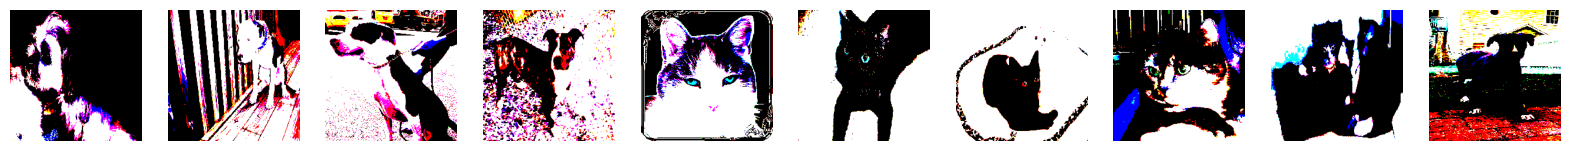

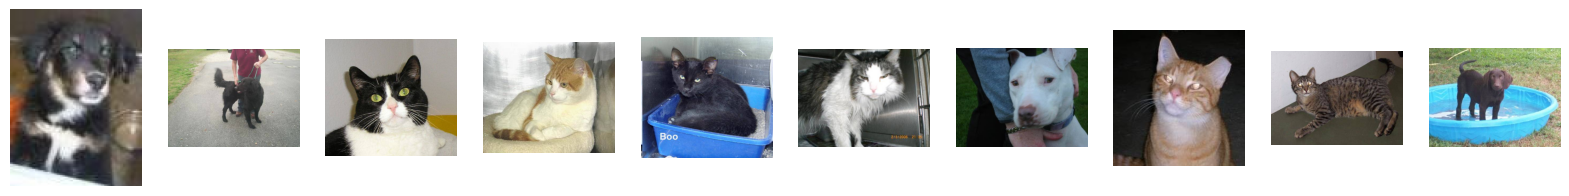

In [21]:
# Plot preprocessed images from train batch
imgs, labels = next(train_batches)
plotImages(imgs)
[print(f"{i}: {label}") for i, label in enumerate(labels, 1)]


# Plot random unpreprocessed images from train subset
images_paths = glob.glob(f"{dataset_path}/train/*/*")  
random_imgs = random.sample(images_paths, 10)

imgs_arr = []
for img in random_imgs:
    img = Image.open(img)
    img_arr = np.asarray(img)
    imgs_arr.append(img_arr)
plotImages(imgs_arr)